# Plot data from organism and wound csv files

Import modules:

In [35]:
import skimage
import napari
from tifffile import imread
from pathlib import Path

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

# Just load seaborn & set theme and the chart looks better:
import seaborn as sns
sns.set_theme()

Insert the pixel size in microns: (depending the microscope objective)  
Insert the timepoint slice where the laser ablation occurs:

In [36]:
size_pixel=0.7692 #in microns
laser_timepoint = 19

Insert the sample csv filename and the corresponding wound csv filename:

In [37]:
file_table_organism='../data/ppties.csv'
file_table_wound = '../data/ppties_wound.csv'

figures_folder = '../data/'

In [38]:
# import the tables
ppties = pd.read_csv(file_table_organism,sep=';')
ppties_wound = pd.read_csv(file_table_wound,sep=';')

In [8]:
print("Here are the available metrics :",list(ppties.columns))

Here are the available metrics : ['label', 'centroid-0', 'centroid-1', 'area', 'perimeter', 'eccentricity', 'orientation', 'axis_major_length', 'axis_minor_length', 'convexity']


## This is an example of plots that can be generated with the shape descriptors analysis

Plot organism area overtime

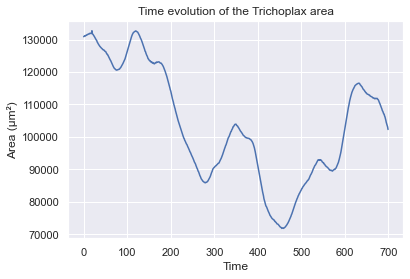

In [23]:
plt.plot(ppties.area*(size_pixel)*(size_pixel))
plt.ylabel('Area (µm²)')
plt.xlabel('Time')
plt.title('Time evolution of the Trichoplax area')
name = figures_folder + "trichoplax_area_time.png"
plt.savefig(name, dpi=300)

Plot organism perimeter. Can be used as a proxy of retraction.

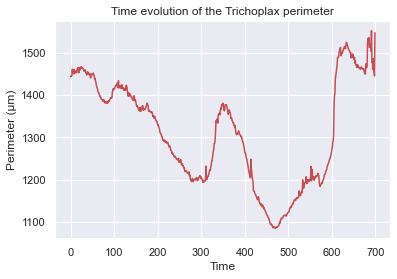

In [16]:
plt.plot(ppties.perimeter*size_pixel, 'r')
plt.ylabel('Perimeter (µm)')
plt.xlabel('Time')
plt.title('Time evolution of the Trichoplax perimeter')
name = figures_folder + "trichoplax_perimeter_time.png"
plt.savefig(name, dpi=300)

**Plot Eccentricity of the organism shape**  
The eccentricity is the ratio of the distance between the foci of the ellipse and its major axis length. The value is between 0 and 1. (0 and 1 are degenerate cases. An ellipse whose eccentricity is 0 is actually a circle, while an ellipse whose eccentricity is 1 is a line segment.)

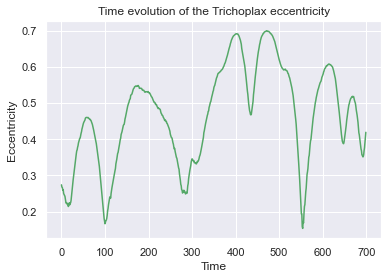

In [17]:
plt.plot(ppties.eccentricity, 'g')
plt.ylabel('Eccentricity')
plt.xlabel('Time')
plt.title('Time evolution of the Trichoplax eccentricity')
name = figures_folder + "trichoplax_eccentricity_time.png"
plt.savefig(name, dpi=300)

**Plot convexity of the organism**  
Below 1, it indicates how much the shape has concaved regions.

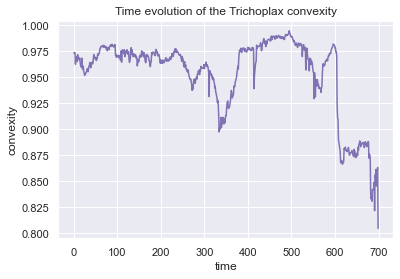

In [18]:
# PLOT CONVEXITY ORGANISM
plt.plot(ppties.convexity, 'm')
plt.ylabel('convexity')
plt.xlabel('time')
plt.title('Time evolution of the Trichoplax convexity')
name = figures_folder + "trichoplax_convexity_time.png"
plt.savefig(name, dpi=300)

Plot exactly the same plots but for the wound shape of the same sample.  

**Plot wound area:**

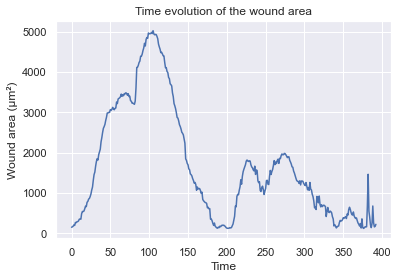

In [39]:
plt.plot(ppties_wound.area*(size_pixel)*(size_pixel))
plt.ylabel('Wound area (µm²)')
plt.xlabel('Time')
plt.title('Time evolution of the wound area')
name = figures_folder + "wound_area_time.png"
plt.savefig(name, dpi=300)

**Plot trichoplax and its wound areas overtime:**

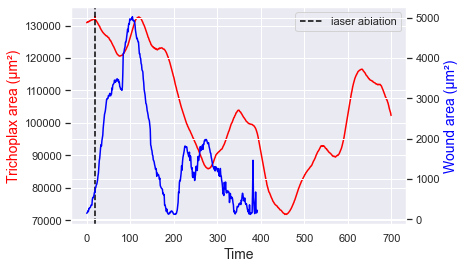

In [65]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(ppties.area*(size_pixel)*(size_pixel),
        color="red")

ax.axvline(laser_timepoint, linestyle ='dashed', color = 'black', label='laser ablation')
ax.legend(bbox_to_anchor = (1.0, 1))

# set x-axis label
ax.set_xlabel("Time", fontsize = 14)
# set y-axis label
ax.set_ylabel("Trichoplax area (µm²)",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(ppties_wound.area*(size_pixel)*(size_pixel),color="blue")
ax2.set_ylabel("Wound area (µm²)",color="blue",fontsize=14)
plt.show()

name = figures_folder + "both_areas_time.png"
fig.savefig(name, dpi=300, bbox_inches='tight')

*Interpretation of the graph above*

The wound retraction (shown by wound area decrease) is always preceded by an entire organism retraction (organism area decrease) !

**Plot wound perimeter overtime**

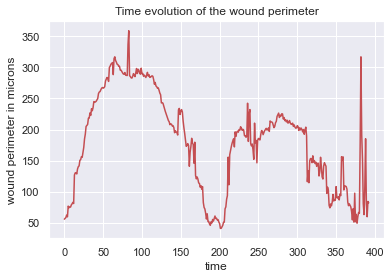

In [41]:
#PLOT PERIMETER WOUND
plt.plot(ppties_wound.perimeter*size_pixel,'r')
plt.ylabel('wound perimeter in microns')
plt.xlabel('time')
plt.title('Time evolution of the wound perimeter')

name = figures_folder + "wound_perimeter_time.png"
plt.savefig(name, dpi=300)

**Plot wound eccentricity**

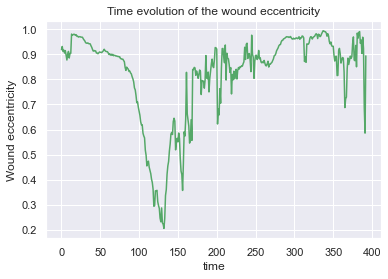

In [42]:
plt.plot(ppties_wound.eccentricity, 'g')
plt.ylabel('Wound eccentricity')
plt.xlabel('time')
plt.title('Time evolution of the wound eccentricity')

name = figures_folder + "wound_eccentricity_time.png"
plt.savefig(name, dpi=300)

**Plot wound convexity**

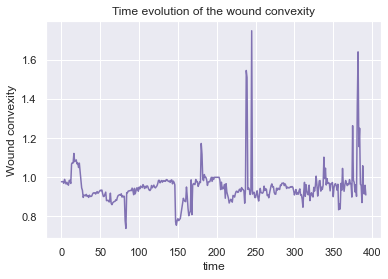

In [43]:
# PLOT CONVEXITY wound
plt.plot(ppties_wound.convexity, 'm')
plt.ylabel('Wound convexity')
plt.xlabel('time')
plt.title('Time evolution of the wound convexity')
name = figures_folder + "wound_convexity_time.png"
plt.savefig(name, dpi=300)

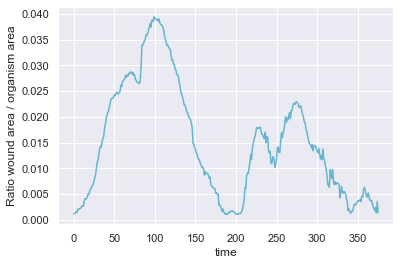

In [31]:
#ratio areas wound and organism
plt.plot(ppties_wound.area/ppties.area, 'c')
plt.ylabel('Ratio wound area / organism area')
plt.xlabel('time')
name = figures_folder + "trichoplax_wound_ratio_areas_time.png"
plt.savefig(name, dpi=300)

**Look at whether the organism and the wound major axis are oriented into the same direction:**

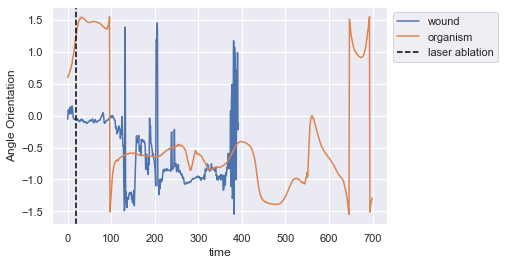

In [66]:
plt.plot(ppties_wound.orientation, label = 'wound')
plt.plot(ppties.orientation, label = 'organism')
plt.ylabel('Angle Orientation')
plt.xlabel('time')

plt.axvline(laser_timepoint, linestyle ='dashed', color = 'black', label='laser ablation')
plt.legend(bbox_to_anchor = (1.0, 1))

name = figures_folder + "compare_orientation_time.png"
plt.savefig(name, dpi=300,bbox_inches='tight')

**Compare the patterns of the organism and the wound convexities:**

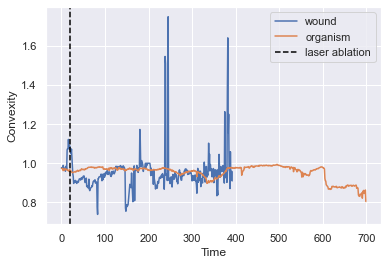

In [59]:
plt.plot(ppties_wound.convexity, label = 'wound')
plt.plot(ppties.convexity, label = 'organism')
plt.ylabel('Convexity')
plt.xlabel('Time')
plt.axvline(laser_timepoint, linestyle ='dashed', color = 'black', label='laser ablation')
plt.legend(bbox_to_anchor = (1.0, 1))
name = figures_folder + "compare_convexities.png"
plt.savefig(name, dpi=300)